In [2]:
import numpy as np
import matplotlib.pyplot as plt

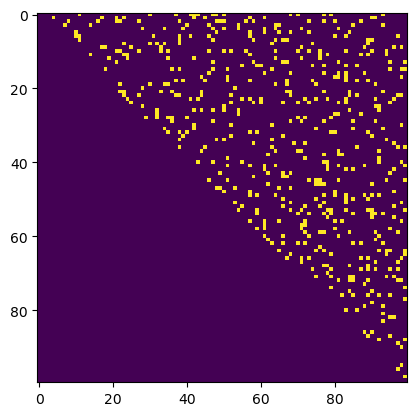

In [34]:
# create an erdos-renyi graph matrix
n = 100
p = .1
dt = 0.001
T = 1000

# Erdos Renyi
A = np.random.rand(n,n) # random matrix
A = np.where(A < p, 1, 0) # adjacency matrix
A = np.triu(A, 1) # triangular matrix

# # Small World
# A = np.zeros((n,n))
# for i in range(n):
#     for j in range(n):
#         if i == j:
#             continue
#         if np.abs(i-j) < 5:
#             A[i,j] = 1
#         elif np.abs(i-j) > n-5:
#             A[i,j] = 1
#         else:
#             A[i,j] = 0


#Code for Creating a Barbell Model for Population Dynamics
#pop = np.random.randint(25,75) #minimum and maximum population sizes
#A = np.zeros((n,n))
#for i in range(n):
#   for j in range(n):
#        if i == j:
#            A[i,j] = 0
#        elif (i <= pop and j <= pop) or (i > pop and j > pop):
#            A[i,j] = 1
#        else:
#            A[i,j] = 0
#sender = np.random.randint(0,pop+1)
#receiver = np.random.randint(pop+1,99)
#A[sender,receiver] = 1
#A[receiver,sender] = 1

# plot
plt.imshow(A)
plt.show()

In [38]:
# drift
mu = np.random.randn(n)

# diffusion
sigma = np.ones(n)

# initial conditions
x = np.zeros((T,n))

kp = np.zeros(n)
km = np.zeros(n)

# simulate
for t in range(T-1):
    x[t+1,:] = x[t,:] + mu*dt + np.sqrt(2*dt)*np.random.randn(n) + kp.dot(A) - km.dot(A)
    # set kick of other processes
    kp = x[t+1,:] < np.inf
    kp = x[t+1,:] > 1
    km = x[t+1,:] > -np.inf
    km = x[t+1,:] < -1
    x[t+1,:] = np.where(x[t+1,:] > 1, np.inf, x[t+1,:])
    x[t+1,:] = np.where(x[t+1,:] < -1, -np.inf, x[t+1,:])
    

print(x[100,:])


[-0.29961131 -0.06544883  0.53497438 -0.24906145        -inf -0.21831205
  0.43833627  0.01569282  0.69284713 -0.62779958 -0.00769803 -0.07402782
 -0.18197794  0.18151294  0.47897716  0.1048096   0.22587846 -0.22388397
 -0.20493084 -0.21776619  0.87286711  0.01172022 -0.16329595         inf
         inf         inf -0.21971395 -0.14223614        -inf        -inf
  0.55580258 -0.46091378        -inf -0.17306848        -inf        -inf
        -inf -0.16404336        -inf        -inf        -inf         inf
  0.40648114        -inf -0.30660089        -inf        -inf        -inf
        -inf        -inf        -inf        -inf  0.24382724        -inf
        -inf        -inf -0.08262773        -inf        -inf        -inf
         inf        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf        -inf        -inf
        -inf        -inf        -inf        -inf   